## Advanced Regression Techniques

In this notebook I will compare Random Forest, AdaBoost, XGBoost and Neural Network Regression with Linear Regression


## Loading in the data

In [1]:
import numpy as np
import scipy as sc
import sklearn as sk 
import pandas as pd

In [184]:
sample_submission = pd.read_csv("/Users/woutaarts//Google Drive/Kaggle/advanced_housing/sample_submission.csv")
test = pd.read_csv("/Users/woutaarts//Google Drive/Kaggle/advanced_housing/test.csv")
train = pd.read_csv("/Users/woutaarts//Google Drive/Kaggle/advanced_housing/train.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## First observations


In [6]:
train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

## Numerical data


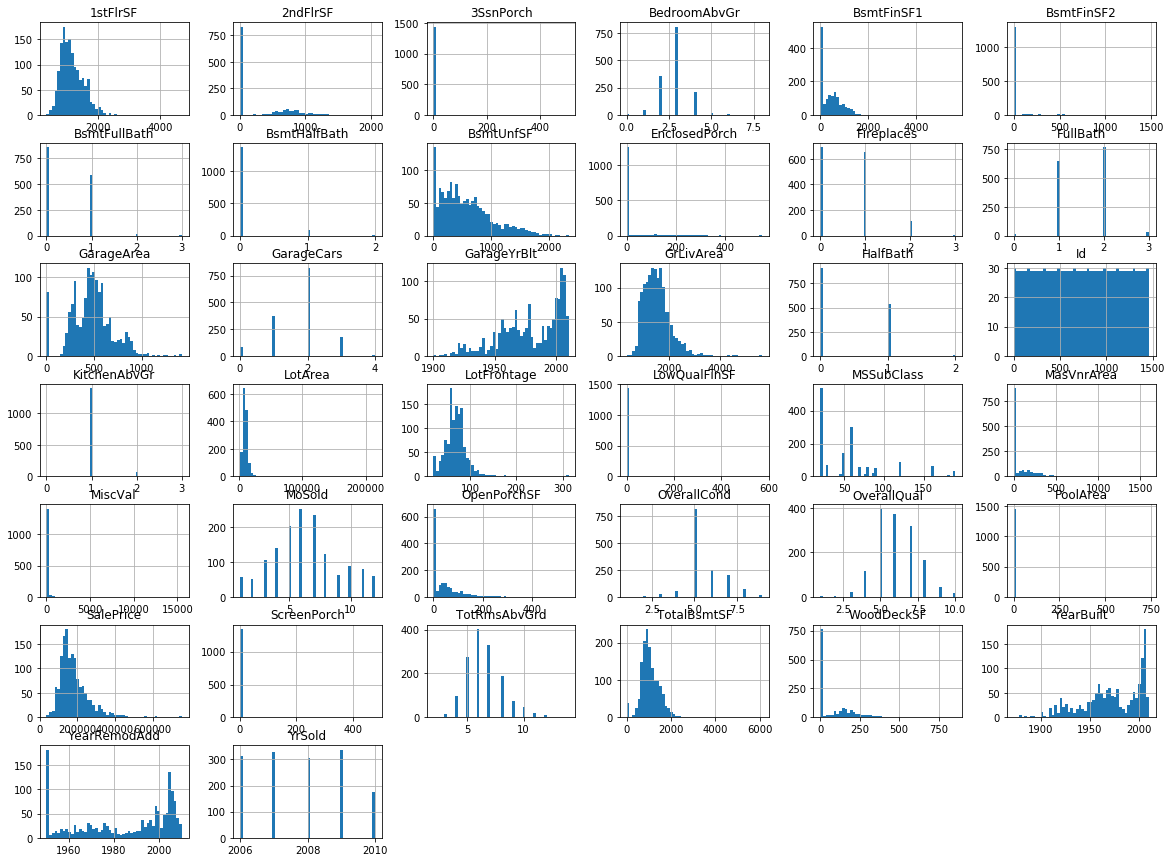

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins = 50 , figsize = (20,15))
plt.show()

In [8]:
train.shape , test.shape

((1460, 81), (1459, 80))

In [10]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [185]:
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(train, test_size = 0.2 , random_state = 42)

In [13]:
train_set.shape , test_set.shape

((1168, 81), (292, 81))

In [4]:
housing = train_set.copy()

In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 81 columns):
Id               1168 non-null int64
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotFrontage      951 non-null float64
LotArea          1168 non-null int64
Street           1168 non-null object
Alley            74 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-

In [16]:
corr_matrix = housing.corr()

In [25]:
corr_matrix["SalePrice"].sort_values(ascending = True)

EnclosedPorch   -0.149532
KitchenAbvGr    -0.142785
MSSubClass      -0.088081
OverallCond     -0.074391
BsmtHalfBath    -0.048346
MiscVal         -0.020179
Id              -0.019643
LowQualFinSF    -0.011189
YrSold          -0.009099
BsmtFinSF2      -0.005731
MoSold           0.041890
3SsnPorch        0.051532
PoolArea         0.115630
ScreenPorch      0.119172
BedroomAbvGr     0.156211
BsmtUnfSF        0.222487
BsmtFullBath     0.226346
LotArea          0.266204
HalfBath         0.280481
OpenPorchSF      0.299969
2ndFlrSF         0.314030
WoodDeckSF       0.329843
LotFrontage      0.330066
BsmtFinSF1       0.359460
Fireplaces       0.457549
MasVnrArea       0.459123
GarageYrBlt      0.480351
YearRemodAdd     0.508593
YearBuilt        0.516501
TotRmsAbvGrd     0.520388
FullBath         0.552546
1stFlrSF         0.587883
TotalBsmtSF      0.597766
GarageArea       0.624139
GarageCars       0.640991
GrLivArea        0.695652
OverallQual      0.785555
SalePrice        1.000000
Name: SalePr

/Users/woutaarts/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b7f0d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b5a7390>]], dtype=object)

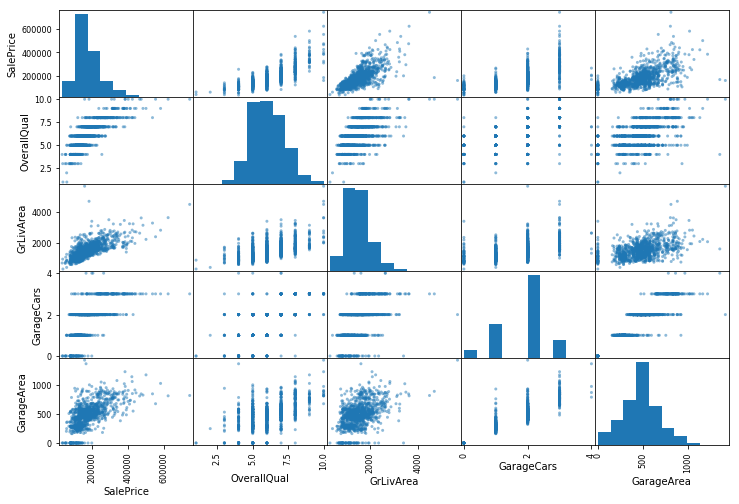

In [21]:
from pandas.tools.plotting import scatter_matrix

attributes = ['SalePrice' , 'OverallQual', 'GrLivArea' ,  'GarageCars' , 'GarageArea' ]
scatter_matrix(housing[attributes], figsize=(12,8))

In [23]:
corr_matrix["GarageCars"].sort_values(ascending = False).head() #garage cars is highly correlated with garagearea 

GarageCars     1.000000
GarageArea     0.882550
SalePrice      0.640991
OverallQual    0.587487
GarageYrBlt    0.569600
Name: GarageCars, dtype: float64

In [7]:

df1 = pd.DataFrame(housing.isnull().sum())
df1.columns = ['nr_nans']
#df1.loc[df1['nr_nans'] > 0].index

x = housing.copy()
for i in df1.loc[df1['nr_nans'] > 0].index:
    
    x = x.drop(i, axis = 1)

x

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,145000
1066,1067,60,RL,7837,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2009,WD,Normal,178000
638,639,30,RL,8777,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,164,0,0,0,0,5,2008,WD,Normal,85000
799,800,50,RL,7200,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,264,0,0,0,0,6,2007,WD,Normal,175000
380,381,50,RL,5000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,242,0,0,0,0,5,2010,WD,Normal,127000
303,304,20,RL,9800,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,7,2006,WD,Abnorml,149900
86,87,60,RL,11911,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2009,WD,Normal,174000
1385,1386,50,RM,5436,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,125500
265,266,20,RL,12090,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,175500
793,794,20,RL,9158,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2007,New,Partial,225000


In [32]:
housing[['PoolArea', 'PoolQC']].sort_values( by='PoolArea' , ascending = False)

,PoolArea,PoolQC
1423,738,Gd
810,648,Fa
1182,555,Ex
1386,519,Fa
197,512,Ex
1298,480,Gd
1225,0,NaN
801,0,NaN
559,0,NaN
487,0,NaN


In [8]:
housing_num = x.loc[:, (housing.dtypes == np.float64) | (housing.dtypes == np.int64)]

housing_num

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
254,255,20,8400,5,6,1957,1957,922,0,392,...,250,0,0,0,0,0,0,6,2010,145000
1066,1067,60,7837,6,7,1993,1994,0,0,799,...,0,40,0,0,0,0,0,5,2009,178000
638,639,30,8777,5,7,1910,1950,0,0,796,...,328,0,164,0,0,0,0,5,2008,85000
799,800,50,7200,5,7,1937,1950,569,0,162,...,0,0,264,0,0,0,0,6,2007,175000
380,381,50,5000,5,6,1924,1950,218,0,808,...,0,0,242,0,0,0,0,5,2010,127000
303,304,20,9800,5,7,1972,1972,894,0,0,...,256,0,0,0,0,0,0,7,2006,149900
86,87,60,11911,6,5,2005,2005,0,0,684,...,100,38,0,0,0,0,0,3,2009,174000
1385,1386,50,5436,4,8,1922,2007,735,0,61,...,0,96,0,0,0,0,0,5,2010,125500
265,266,20,12090,6,6,1981,1981,588,228,606,...,276,0,0,0,0,0,0,6,2008,175500
793,794,20,9158,8,5,2007,2007,0,0,1496,...,168,130,0,0,0,0,0,6,2007,225000


## Categorical data




choose which categorical features I want to add


In [9]:
housing_cat = housing.loc[:, (housing.dtypes != np.float64) & (housing.dtypes != np.int64)]


# for i in housing_cat.columns:
#     #print ('name feature:', i) 
#     print( i, 'amount of nan is ' , housing_cat[i].isnull().sum())
#     print (housing_cat[i].value_counts())



In [5]:



def convert_to_other_cat(column, n):
    if len(column.value_counts().reset_index()) > n:
        for i in range(len(column)):
            if column.iloc[i] not in column.value_counts().reset_index()['index'][:n].tolist():
                column.iloc[i]  = 'Other' 
    return 

def nan_to_1hot(column):
    for i in range(len(column)):
        if str(column.iloc[i]) == 'nan':
            column.iloc[i] = 0
        else:
            column.iloc[i] = 1
    return


In [ ]:

nan_to_1hot(housing_cat['FireplaceQu'])
nan_to_1hot(housing_cat['PoolQC'])


convert_to_other_cat( housing_cat['MSZoning'] , 2 )
convert_to_other_cat( housing_cat['Alley'] , 2 )
convert_to_other_cat( housing_cat['LotConfig'] , 2 )
convert_to_other_cat( housing_cat['BldgType'] , 1 )
convert_to_other_cat( housing_cat['HouseStyle'] , 2 )
convert_to_other_cat( housing_cat['Exterior1st'] , 4 )



In [14]:


cat_features_ready = [ 'MSZoning' , 
                      'LotConfig', 
                      'Neighborhood' , 
                      'HouseStyle' , 
                      'Exterior1st', 
                      'BldgType',
                     'HouseStyle',
                      'Heating'
                     ]

boolean_features = ['FireplaceQu', 'PoolQC']

housing_cat[cat_features_ready]





,MSZoning,LotConfig,Neighborhood,HouseStyle,HouseStyle,Exterior1st,BldgType,HouseStyle,HouseStyle,Heating
254,RL,Inside,NAmes,1Story,1Story,MetalSd,1Fam,1Story,1Story,GasA
1066,RL,Inside,Gilbert,2Story,2Story,VinylSd,1Fam,2Story,2Story,GasA
638,RL,Inside,Edwards,1Story,1Story,MetalSd,1Fam,1Story,1Story,GasA
799,RL,Corner,SWISU,1.5Fin,1.5Fin,Wd Sdng,1Fam,1.5Fin,1.5Fin,GasA
380,RL,Inside,SWISU,1.5Fin,1.5Fin,BrkFace,1Fam,1.5Fin,1.5Fin,GasA
303,RL,Corner,CollgCr,1Story,1Story,VinylSd,1Fam,1Story,1Story,GasA
86,RL,Inside,Gilbert,2Story,2Story,VinylSd,1Fam,2Story,2Story,GasA
1385,RM,Inside,IDOTRR,1.5Fin,1.5Fin,VinylSd,1Fam,1.5Fin,1.5Fin,GasA
265,RL,Inside,NWAmes,1Story,1Story,MetalSd,1Fam,1Story,1Story,GasA
793,RL,Inside,Somerst,1Story,1Story,CemntBd,1Fam,1Story,1Story,GasA


In [11]:
housing_cat = housing_cat[cat_features_ready]


In [12]:
housing_cat

,MSZoning,LotConfig,Neighborhood,HouseStyle,Exterior1st,BldgType,HouseStyle,Heating
254,RL,Inside,NAmes,1Story,MetalSd,1Fam,1Story,GasA
1066,RL,Inside,Gilbert,2Story,VinylSd,1Fam,2Story,GasA
638,RL,Inside,Edwards,1Story,MetalSd,1Fam,1Story,GasA
799,RL,Corner,SWISU,1.5Fin,Wd Sdng,1Fam,1.5Fin,GasA
380,RL,Inside,SWISU,1.5Fin,BrkFace,1Fam,1.5Fin,GasA
303,RL,Corner,CollgCr,1Story,VinylSd,1Fam,1Story,GasA
86,RL,Inside,Gilbert,2Story,VinylSd,1Fam,2Story,GasA
1385,RM,Inside,IDOTRR,1.5Fin,VinylSd,1Fam,1.5Fin,GasA
265,RL,Inside,NWAmes,1Story,MetalSd,1Fam,1Story,GasA
793,RL,Inside,Somerst,1Story,CemntBd,1Fam,1Story,GasA


In [15]:
housing_bool = housing[boolean_features]

#nan_to_1hot(housing_bool['FireplaceQu'])
#nan_to_1hot(housing_bool['PoolQC'])


housing_bool


,FireplaceQu,PoolQC
254,NaN,NaN
1066,TA,NaN
638,NaN,NaN
799,TA,NaN
380,Gd,NaN
303,NaN,NaN
86,Gd,NaN
1385,NaN,NaN
265,TA,NaN
793,NaN,NaN


In [112]:
from sklearn.preprocessing import LabelBinarizer 

for i in cat_features_ready:
    
housing_cat = housing[['LandContour']]# , 'Neighborhood']]

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)

housing_cat_1hot

In [113]:
housing_cat_1hot

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ..., 
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [16]:
num_attribs = list(housing_num)
cat_attribs = list(housing_cat)
bool_attribs = list(housing_bool)

In [18]:
num_attribs , cat_attribs , bool_attribs

(['Id',
  'MSSubClass',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'],
 ['MSZoning',
  'LotConfig',
  'Neighborhood',
  'HouseStyle',
  'Exterior1st',
  'BldgType',
  'HouseStyle',
  'Heating'],
 ['FireplaceQu', 'PoolQC'])

Because I cannot figure out the stupid pipeline, I will build up the dataset myself

In [20]:
housing[num_attribs].head() 

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
254,255,20,8400,5,6,1957,1957,922,0,392,...,250,0,0,0,0,0,0,6,2010,145000
1066,1067,60,7837,6,7,1993,1994,0,0,799,...,0,40,0,0,0,0,0,5,2009,178000
638,639,30,8777,5,7,1910,1950,0,0,796,...,328,0,164,0,0,0,0,5,2008,85000
799,800,50,7200,5,7,1937,1950,569,0,162,...,0,0,264,0,0,0,0,6,2007,175000
380,381,50,5000,5,6,1924,1950,218,0,808,...,0,0,242,0,0,0,0,5,2010,127000


In [21]:
housing[cat_attribs].head()

,MSZoning,LotConfig,Neighborhood,HouseStyle,Exterior1st,BldgType,HouseStyle,Heating
254,RL,Inside,NAmes,1Story,MetalSd,1Fam,1Story,GasA
1066,RL,Inside,Gilbert,2Story,VinylSd,1Fam,2Story,GasA
638,RL,Inside,Edwards,1Story,MetalSd,1Fam,1Story,GasA
799,RL,Corner,SWISU,1.5Fin,Wd Sdng,1Fam,1.5Fin,GasA
380,RL,Inside,SWISU,1.5Fin,BrkFace,1Fam,1.5Fin,GasA


/Users/woutaarts/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


None
None


In [22]:
 housing[bool_attribs].head() 

,FireplaceQu,PoolQC
254,NaN,NaN
1066,TA,NaN
638,NaN,NaN
799,TA,NaN
380,Gd,NaN


## building a pipeline

First I'm copying some stuff from A. Geron his github 

https://github.com/ageron/handson-ml/blob/master/02_end_to_end_machine_learning_project.ipynb




In [25]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out


#from sklearn.preprocessing import CategoricalEncoder # in future versions of Scikit-Learn


In [194]:

#from sklearn.preprocessing import CategoricalEncoder # in future versions of Scikit-Learn



In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

    
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])



full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [221]:
housing_prepared = full_pipeline.fit_transform(housing)
#housing[cat_attribs].isnull().sum()

/Users/woutaarts/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


TypeError: '>' not supported between instances of 'float' and 'str'

In [253]:
num_pipeline.fit_transform(housing[num_attribs])

/Users/woutaarts/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[-1.11928402, -0.8667643 , -0.21289571, ..., -0.13341669,
         1.65006527, -0.47185427],
       [ 0.79046412,  0.07410996, -0.26524463, ..., -0.5080097 ,
         0.89367742, -0.04456195],
       [-0.21615189, -0.63154574, -0.17784146, ..., -0.5080097 ,
         0.13728958, -1.24874939],
       ..., 
       [ 1.32669882, -0.8667643 , -0.23409563, ..., -0.88260272,
        -1.37548612, -0.86030183],
       [ 0.30597137, -0.16110861, -0.28337613, ..., -0.13341669,
        -0.61909827,  0.11016966],
       [ 0.93157852,  1.48542135, -0.65139925, ..., -0.13341669,
         0.89367742, -0.09635496]])

In [178]:
# housing = train_set.copy()
# convert_to_other_cat( housing['HouseStyle'] , 2 )

def column_to_onehot(housing, cattribute):
    from sklearn.preprocessing import LabelBinarizer 
    housing_cat = housing[cattribute]# , 'Neighborhood']]
    encoder = LabelBinarizer()
    #print(housing_cat)
    housing_cat_1hot = encoder.fit_transform(housing_cat)

    output =  pd.DataFrame(housing_cat_1hot)
    #output.columns = encoder.classes_

    columnz = []
    for j in encoder.classes_:
        columnz.append(cattribute + '_' + j)
    
#     if cattribute == 'HouseStyle':
#         print('encoder.classes_ is: ' , encoder.classes_)
#         print('output.columns is: ' , output.columns)
#         print('columnz is: ' , columnz)
#         print('length columnS is' , len(output.columns))
#         print('length columnZ is' , len(columnz))
    #output.columns = columnz
    #print(columnz)

    return output 

print(cat_attribs)

#column_to_onehot(housing , 'HouseStyle')

['MSZoning', 'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st', 'BldgType', 'HouseStyle', 'Heating']


In [ ]:
housing.

In [29]:
def nan_to_onehot(x):
    if str(x) == 'nan':
        return 0.
    return 1.

housing['FireplaceQu'].apply(nan_to_onehot)

254     0.0
1066    1.0
638     0.0
799     1.0
380     1.0
303     0.0
86      1.0
1385    0.0
265     1.0
793     0.0
1445    0.0
808     1.0
1099    1.0
605     1.0
701     0.0
221     1.0
113     1.0
548     0.0
1073    0.0
174     1.0
514     0.0
1350    0.0
1145    1.0
965     1.0
936     0.0
285     0.0
1310    1.0
342     0.0
1165    0.0
31      0.0
       ... 
747     1.0
252     0.0
21      1.0
1337    0.0
459     1.0
1184    1.0
276     0.0
955     0.0
1215    0.0
385     1.0
805     0.0
1437    1.0
343     1.0
769     1.0
1332    1.0
130     1.0
871     0.0
1123    0.0
1396    1.0
87      0.0
330     0.0
1238    0.0
466     1.0
121     0.0
1044    1.0
1095    1.0
1130    1.0
1294    0.0
860     1.0
1126    1.0
Name: FireplaceQu, Length: 1168, dtype: float64

In [170]:
housing = train_set.copy()
convert_to_other_cat( housing['MSZoning'] , 2 )
convert_to_other_cat( housing['LotConfig'] , 2 )
convert_to_other_cat( housing['BldgType'] , 1 )
convert_to_other_cat( housing['HouseStyle'] , 2 )
convert_to_other_cat( housing['Exterior1st'] , 4 )
convert_to_other_cat( housing['Neighborhood'] , 8 )



/Users/woutaarts/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [172]:
#gonna add the one-hot arrays to the numerical dataset
# housing = train_set.copy()
# convert_to_other_cat( housing['MSZoning'] , 2 )
# convert_to_other_cat( housing['LotConfig'] , 2 )
# convert_to_other_cat( housing['BldgType'] , 1 )
# convert_to_other_cat( housing['HouseStyle'] , 2 )
# convert_to_other_cat( housing['Exterior1st'] , 4 )
def creating_model_set(housing , num_attribs, cat_attribs , bool_attribs ):
    #create initial dataset with numberical values
    df = pd.DataFrame(num_pipeline.fit_transform(housing[num_attribs]))
    df.columns = num_attribs
    
    #add boolean features 
#     for i in bool_attribs:
#         print(i)
#         print (housing[i].apply(nan_to_onehot))
#         df[i] = housing[i].apply(nan_to_onehot)
#         print (df[i])


    #add categorical onehot     
    for i in cat_attribs:
        #print(column_to_onehot(housing[i]))
        df_i = column_to_onehot(housing , i )
    
        columnz = []
        for j in df_i.columns:
            columnz.append(str(i) + '_' + str(j))
        df_i.columns = columnz
        df = pd.concat([df, df_i ] ,axis=1)


    return df



df = creating_model_set(housing , num_attribs, cat_attribs , bool_attribs)    


#print(df)

encoder.classes_ is:  ['1Story' '2Story' 'Other']
output.columns is:  RangeIndex(start=0, stop=3, step=1)
columnz is:  ['HouseStyle_1Story', 'HouseStyle_2Story', 'HouseStyle_Other']
length columnS is 3
length columnZ is 3
encoder.classes_ is:  ['1Story' '2Story' 'Other']
output.columns is:  RangeIndex(start=0, stop=3, step=1)
columnz is:  ['HouseStyle_1Story', 'HouseStyle_2Story', 'HouseStyle_Other']
length columnS is 3
length columnZ is 3


/Users/woutaarts/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [173]:
for i in df:
    print (i)

Id
MSSubClass
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
MSZoning_0
MSZoning_1
MSZoning_2
LotConfig_0
LotConfig_1
LotConfig_2
Neighborhood_0
Neighborhood_1
Neighborhood_2
Neighborhood_3
Neighborhood_4
Neighborhood_5
Neighborhood_6
Neighborhood_7
Neighborhood_8
HouseStyle_0
HouseStyle_1
HouseStyle_2
Exterior1st_0
Exterior1st_1
Exterior1st_2
Exterior1st_3
Exterior1st_4
BldgType_0
HouseStyle_0
HouseStyle_1
HouseStyle_2
Heating_0
Heating_1
Heating_2
Heating_3
Heating_4
Heating_5


# MODELLING


In [230]:
sample_submission = pd.read_csv("/Users/woutaarts//Google Drive/Kaggle/advanced_housing/sample_submission.csv")
test = pd.read_csv("/Users/woutaarts//Google Drive/Kaggle/advanced_housing/test.csv")
train = pd.read_csv("/Users/woutaarts//Google Drive/Kaggle/advanced_housing/train.csv")

housing = train.copy()

print(housing.shape)

convert_to_other_cat( housing['MSZoning'] , 2 )
convert_to_other_cat( housing['LotConfig'] , 2 )
convert_to_other_cat( housing['BldgType'] , 1 )
convert_to_other_cat( housing['HouseStyle'] , 2 )
convert_to_other_cat( housing['Exterior1st'] , 4 )
convert_to_other_cat( housing['Neighborhood'] , 8 )
convert_to_other_cat( housing['Heating'] , 2 )

print(housing.shape)

from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(housing, test_size = 0.2 , random_state = 42)


print(train_set.shape , test_set.shape)




(1460, 81)


/Users/woutaarts/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


(1460, 81)
(1168, 81) (292, 81)


In [231]:
train.shape , train_set.shape , test_set.shape

((1460, 81), (1168, 81), (292, 81))

In [232]:


housing_train = train_set.copy()
housing_test  = test_set.copy()

print(housing_train.shape , housing_test.shape)

df_train = creating_model_set(housing_train , num_attribs, cat_attribs , bool_attribs)
df_test = creating_model_set(housing_test , num_attribs, cat_attribs , bool_attribs)

print(df_train.shape , df_test.shape)


(1168, 81) (292, 81)
(1168, 65) (292, 65)


/Users/woutaarts/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/woutaarts/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [233]:
X_train = df_train.drop('SalePrice', axis=1)
y_train = housing_train.SalePrice

X_test = df_test.drop('SalePrice', axis=1)
y_test = housing_test.SalePrice



In [234]:

X_train.shape , y_train.shape , X_test.shape, y_test.shape 



((1168, 64), (1168,), (292, 64), (292,))

## Linear Regression

In [270]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train , y_train)

pred = lin_reg.predict(X_test)


In [271]:

y_test[:10].tolist() , pred[:10].tolist()

([154500,
  325000,
  115000,
  159000,
  315500,
  75500,
  311500,
  146000,
  84500,
  135500],
 [4247025594000512.0,
  2.7841979258406304e+16,
  3.3005831191389696e+16,
  1.9695289116450304e+16,
  2.878549362772256e+16,
  -1.6325901268821328e+17,
  9342648136512128.0,
  1.2218792740767232e+16,
  -1.6867568221499382e+17,
  2.387786407658307e+16])

In [247]:
np.min(pred)

-4.1195182423714202e+17

wtf???

In [248]:
np.min(y_test)

35311

## Random Forest

In [307]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train , y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [308]:
forest_pred = forest_reg.predict(X_test)
forest_pred[0:10]

array([ 144305. ,  336603.5,  129115. ,  175690. ,  350469.8,   90950. ,
        246322.5,  153990. ,   83330. ,  135588.7])

In [309]:
y_test[0:10]

892     154500
1105    325000
413     115000
522     159000
1036    315500
614      75500
218     311500
1160    146000
649      84500
887     135500
Name: SalePrice, dtype: int64

In [310]:
from sklearn.metrics import mean_squared_error

forest_mse = mean_squared_error(y_test , forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

28675.347399374165

In [ ]:
forest_reg

First default Random Forest gives a RMSE of 28991

In [313]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10,15,20,25], 'max_depth': ,'max_features': [2, 4, 6, 7,8,9,10,12]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]


# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train , y_train)

print(grid_search.best_params_)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

{'max_features': 6, 'n_estimators': 20}
35551.6583697 {'max_features': 2, 'n_estimators': 10}
35421.0697289 {'max_features': 2, 'n_estimators': 15}
35732.3712732 {'max_features': 2, 'n_estimators': 20}
33666.7821198 {'max_features': 2, 'n_estimators': 25}
34004.8709621 {'max_features': 4, 'n_estimators': 10}
33341.7977507 {'max_features': 4, 'n_estimators': 15}
32846.8232754 {'max_features': 4, 'n_estimators': 20}
31115.9735506 {'max_features': 4, 'n_estimators': 25}
34277.2308262 {'max_features': 6, 'n_estimators': 10}
33819.2295882 {'max_features': 6, 'n_estimators': 15}
30789.9346957 {'max_features': 6, 'n_estimators': 20}
32255.885492 {'max_features': 6, 'n_estimators': 25}
35877.8275708 {'max_features': 7, 'n_estimators': 10}
33306.5367195 {'max_features': 7, 'n_estimators': 15}
31820.3352799 {'max_features': 7, 'n_estimators': 20}
31367.8168895 {'max_features': 7, 'n_estimators': 25}
32836.0078541 {'max_features': 8, 'n_estimators': 10}
32253.2154214 {'max_features': 8, 'n_estima

## Adaboost

In [285]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_pred[0:10]

ada_mse = mean_squared_error(y_test , ada_pred)
ada_rmse = np.sqrt(ada_mse)
ada_rmse

34803.798108943898

In [291]:
str(AdaBoostRegressor())[:5]

'AdaBo'

First default AdaBoost gives a RMSE of 34803

## Gradient Boosting

In [292]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
gbr_pred[0:10]

gbr_mse = mean_squared_error(y_test , gbr_pred)
gbr_rmse = np.sqrt(gbr_mse)
gbr_rmse


28821.009249143302

First default GradientBoost gives a RMSE of 28821 (winner)